# Week 8 - Advanced Machine Learning

## Semi-supervised learning

Semi-supervised learning can be a useful strategy for working with datasets that are only partially labeled. Collecting unlabeled data is often far easier than collecting labels. Performance improvements can often be realized over training on the small number of labeled examples alone.

Just as we can study the structure of a dataset using unsupervised techniques we can transfer knowledge gained on the unlabeled examples to refine the predictions made on the labeled samples.

## Scikit learn

Scikit learn has several options available for [semi-supervised learning](http://scikit-learn.org/stable/modules/label_propagation.html).

In [1]:
# Example taken from http://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html
# Authors: Clay Woolam <clay@woolam.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_circles

%matplotlib inline

# generate ring with inner box
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = -np.ones(n_samples)
labels[0] = outer
labels[-1] = inner

labels

array([ 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [4]:
label_spread = label_propagation.LabelSpreading(kernel='knn', alpha=0.99)
label_spread.fit(X, labels)

C:\Users\stree\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:288: ConvergenceWarning: max_iter=30 was reached without convergence.
  category=ConvergenceWarning


LabelSpreading(alpha=0.99, gamma=20, kernel='knn', max_iter=30, n_jobs=1,
        n_neighbors=7, tol=0.001)

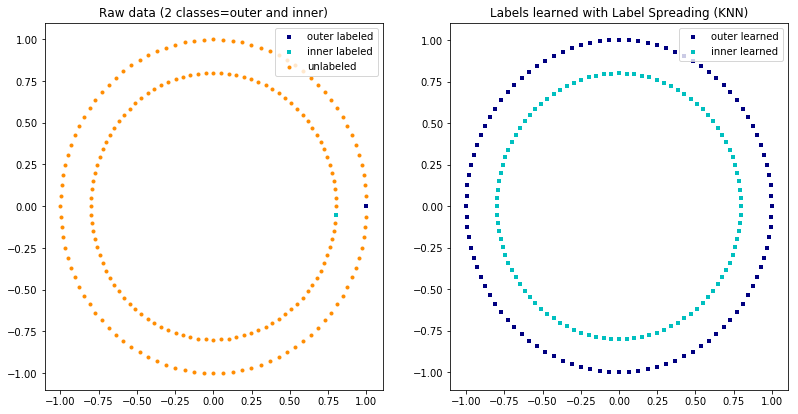

In [5]:
output_labels = label_spread.transduction_
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

plt.subplot(1, 2, 2)
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
            marker='s', lw=0, s=10, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
            marker='s', lw=0, s=10, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Spreading (KNN)")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()

[There is another example in the scikit learn documentation combining semi-supervised learning with active learning](http://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits_active_learning.html)